<font color=lightblue size=6>Support Vector Machine</font>

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [13]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [11]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [14]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [19]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df[45:]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                 4.8               3.0                1.4               0.3   
46                 5.1               3.8                1.6               0.2   
47                 4.6               3.2                1.4               0.2   
48                 5.3               3.7                1.5               0.2   
49                 5.0               3.3                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target flower_name  
45        0      setosa  
46        0      setosa  
47        0      setosa  
48        0      setosa  
49        0      setosa  
..      ...         ...  
145       2   virginica  
146       2   virginica  
147       2   virginica  
148       2   virginica  
149       2   virginica  

[105 rows x 6 columns]

In [20]:
df0 = df[:50] #setosa
df1 = df[50:100] #versicolor
df2 = df[100:] #virginica

In [21]:
import matplotlib.pyplot as plt

<font color=red>Sepal length vs Sepal width(setosa vs versicoor)

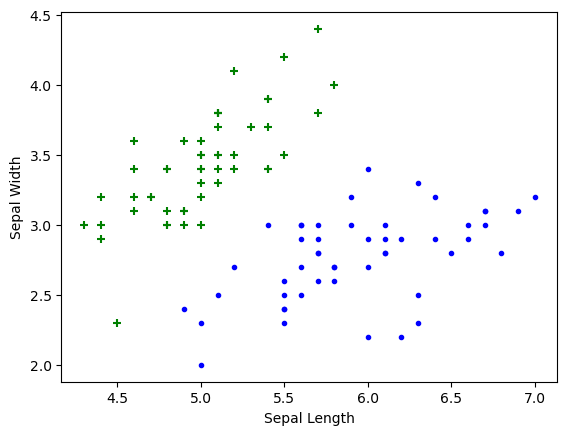

In [22]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

<font color=red>petal length vs petal width(setosa vs versicolor)

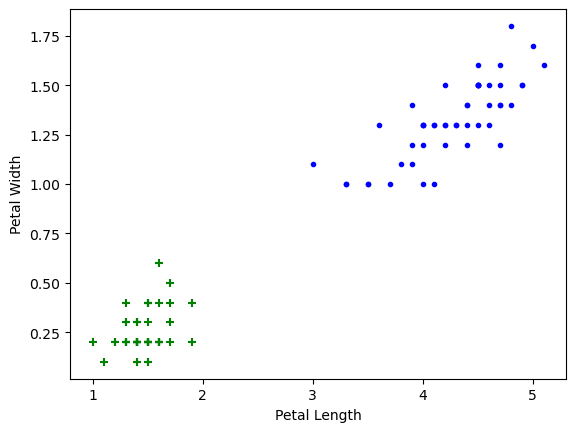

In [23]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

<font color=red>Train using Support Vector Machine(SVM)

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['target','flower_name'], axis='columns')
Y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
len(X_train)

120

In [29]:
len(X_test)

30

In [30]:
from sklearn.svm import SVC
model = SVC()

In [31]:
model.fit(X_train,y_train)

SVC()

In [32]:
model.score(X_test,y_test)

1.0

In [33]:
model.predict([[4.8,3.0,1.5,0.3]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

<font size=6>Tune parameters</font>

1.Regularization (C)

In [35]:
model_c = SVC(C=10)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.9666666666666667

2.Gamma

In [36]:
model_g = SVC(gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.9333333333333333

3.Kernel

In [37]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667